In [48]:
#Import the libraries
import pandas as pd
import os
import gensim

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

In [50]:
print(os.getcwd())

C:\Users\BrindhaM\Documents\CelStrat MlL\AI Webinar\Recommendation


In [51]:
os.chdir('C:/Users/BrindhaM/Documents/CelStrat MlL/AI Webinar/Recommendation')

In [52]:
print(os.getcwd())

C:\Users\BrindhaM\Documents\CelStrat MlL\AI Webinar\Recommendation


In [53]:
df=pd.read_excel("Online Retail.xlsx")

In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df.shape

(541909, 8)

In [56]:
#preprocessing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
#drop the missing rows
df.dropna(inplace=True)

In [57]:
#Updated after sropping missing values
df.shape

(541909, 8)

In [58]:
#check the unique customers in dataset
len(df['CustomerID'].unique())
#4372 unique customers are there

4373

In [59]:
df['StockCode']= df['StockCode'].astype(str)

In [60]:
#Shuffle customer ids
customers=df['CustomerID'].unique().tolist()
#length
len(customers)

4373

In [61]:
import random
#shuffle customer ids
random.shuffle(customers)

In [62]:
#set the training and validation apart
#extract 90% of customer ids for training
customers_train=[customers[i] for i in range(round(0.9*len(customers)))]

In [63]:
#assign train and validatin set
#Train set
train_df=df[df['CustomerID'].isin(customers_train)]
#validation set
val_df=df[~df['CustomerID'].isin(customers_train)]

In [64]:
#list to create ourchase history
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in customers_train:
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)


In [65]:
#list to create ourchase history
# list to capture purchase history of the customers
val_train = []

# populate the list with the product codes
for i in val_df['CustomerID'].unique():
    temp = val_df[val_df["CustomerID"] == i]["StockCode"].tolist()
    val_train.append(temp)

In [66]:
val_train

[['84879',
  '22745',
  '22748',
  '22749',
  '22310',
  '84969',
  '22623',
  '22622',
  '21754',
  '21755',
  '21777',
  '48187',
  '22960',
  '22913',
  '22912',
  '22914',
  '21756',
  '22274',
  '16161P',
  '22766',
  '22708',
  '23231',
  '85015',
  '85016',
  '22829',
  '22722',
  '22960',
  '22961',
  '22969',
  '22720',
  '22549',
  '20972',
  '22743',
  '84969',
  '22622',
  '21658',
  '21756',
  '21754',
  '21755',
  '48184',
  '22692',
  '22748',
  '22745',
  '22749',
  '22960',
  '22722',
  '22720',
  '20972',
  '22274',
  '84969',
  '22623',
  '22499',
  '22607',
  '21658',
  '47566',
  '21756',
  '21754',
  '21755',
  '21902',
  '21901',
  '21899',
  '21900',
  '22077',
  '85123A',
  '84969',
  '21658',
  '22969',
  '23152',
  '23182',
  '23161',
  '23160',
  '23163',
  '23162',
  '23164',
  '23177',
  '23176',
  '23006',
  '22996',
  '23070',
  '23126',
  '23299',
  '84969',
  '21658',
  '22423',
  '47566',
  '21621',
  '21658',
  '23126',
  '23092',
  '23112',
  '23110

In [67]:
#Build wor2vecembeddings for the products
from gensim.models import Word2Vec

In [68]:
#train the model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

In [69]:
model.build_vocab(purchases_train, progress_per=200)

In [ ]:
#Word2Vec expects a sentence to be "list of strings", not "list of ints". I suspect you'll have other issues too, if you break that contract.

In [70]:
model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3507221, 3543720)

In [71]:
model.init_sims(replace=True)

In [72]:
#Model Summary
print(model)

Word2Vec(vocab=3160, size=100, alpha=0.03)


In [74]:
model.wv.vectors

array([[-0.06067319, -0.07597604, -0.16174479, ...,  0.01990625,
         0.06178358,  0.07479893],
       [-0.0310973 , -0.14627999, -0.10344265, ...,  0.02746986,
         0.01915892,  0.13656722],
       [ 0.05550471, -0.0708885 , -0.31459507, ...,  0.09996868,
         0.03404322,  0.04936884],
       ...,
       [-0.03637671, -0.05904679, -0.12159341, ..., -0.01121597,
         0.15266824,  0.14982302],
       [ 0.01103451,  0.0261425 , -0.14724648, ...,  0.09316887,
         0.05297944, -0.00637749],
       [ 0.19246589, -0.0375461 , -0.01599992, ..., -0.04188383,
         0.05567549, -0.01746617]], dtype=float32)

In [75]:
model.wv.vectors.shape

(3160, 100)

In [82]:
#GET the vocab
vocab=list(model.wv.vocab)
print(vocab)


['23206', '23256', '23199', '23204', '20712', '23254', '22379', '22381', '22380', '22386', '22385', '85099B', '85099F', '22356', '22355', '20719', '20724', '20723', '21578', '21936', '21937', '20725', '20728', '20726', '22326', '22382', '22383', '22384', '84997B', '84997D', '22362', '22363', '20685', '22399', '22398', 'POST', '21931', '20713', '23201', '21429', '21648', '47590A', '22668', '47590B', '22328', '22628', '21976', '21731', '22299', '23156', '21883', '21452', '22960', '23237', '23240', '23236', '23191', '22759', '84997C', '84997A', '23310', '23369', '22467', '21463', '21464', '21121', '21212', '70006', '22435', '22436', '23480', '23084', '22504', '21439', '21621', '22329', '23207', '23353', '23349', '22818', '23403', '47591D', '22989', '23243', '47559B', '23096', '22720', '22722', '22907', '22138', '22139', '84978', '22617', '22696', '46000S', '46000U', '22957', '22967', '22858', '22859', '22860', '22861', '22813', '22584', '48187', '22691', '22740', '22741', '22752', '22755'

In [79]:
#Visualize the embeddings
#use tsne
X_pca=model.wv.vectors
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(3160, 2)

In [83]:
df1 = pd.DataFrame(tsne, index=vocab,columns=['X','Y'])
#view the df
df1

,X,Y
23206,41.857204,20.681267
23256,3.161557,23.733976
23199,-69.324440,-23.470978
23204,56.240818,-4.362666
20712,-16.426556,-28.614656
23254,-65.649086,-29.465487
22379,-6.164096,23.550014
22381,-40.921291,-37.670338
22380,-68.682175,-26.889044
22386,-37.406521,-43.205864


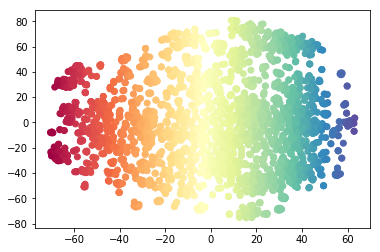

In [86]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df1['X'],df1['Y'],c=df1['X'],cmap='Spectral')
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
plt.show()

In [76]:
#Lets start recommending products
products = train_df[["StockCode", "Description"]]

In [77]:
products

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT
26,22728,ALARM CLOCK BAKELIKE PINK


In [88]:
#remve the duplicates
products.drop_duplicates(inplace=True,subset='StockCode',keep='last')

In [89]:
products.shape

(4062, 2)

In [99]:
# create product-ID and product-description dictionary
    products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [100]:
products_dict

{'10002': [nan],
 '10080': ['GROOVY CACTUS INFLATABLE'],
 '10120': ['DOGGY RUBBER'],
 '10123C': [nan],
 '10123G': [nan],
 '10124A': ['SPOTS ON RED BOOKCOVER TAPE'],
 '10124G': ['ARMY CAMO BOOKCOVER TAPE'],
 '10125': ['MINI FUNKY DESIGN TAPES'],
 '10133': ['damaged'],
 '10134': [nan],
 '10135': ['COLOURING PENCILS BROWN TUBE'],
 '11001': ['ASSTD DESIGN RACING CAR PEN'],
 '15030': ['FAN BLACK FRAME '],
 '15034': ['PAPER POCKET TRAVELING FAN '],
 '15036': ['ASSORTED COLOURS SILK FAN'],
 '15039': ['SANDALWOOD FAN'],
 '15044A': ['PINK PAPER PARASOL '],
 '15044B': ['BLUE PAPER PARASOL '],
 '15044C': ['PURPLE PAPER PARASOL'],
 '15044D': ['RED PAPER PARASOL'],
 '15056BL': ['EDWARDIAN PARASOL BLACK'],
 '15056N': ['EDWARDIAN PARASOL NATURAL'],
 '15056P': ['EDWARDIAN PARASOL PINK'],
 '15056bl': ['EDWARDIAN PARASOL BLACK'],
 '15056n': ['EDWARDIAN PARASOL NATURAL'],
 '15056p': ['EDWARDIAN PARASOL PINK'],
 '15058A': ['BLUE POLKADOT GARDEN PARASOL'],
 '15058B': ['PINK POLKADOT GARDEN PARASOL'],
 '150

In [101]:
#Test the dictionary
products_dict['16162L']

['THE KING GIFT BAG']

In [108]:
#Define the top 6  similar products
def similar_products(v,n=6):
    ms=model.similar_by_vector(v,topn=n+1)
    return ms
    #extract the name and similarity
    #new_ms=[]
    #for j in ms:
        #pair=(products_dict[j[0][0],j[1]])
        #new_ms.append(pair)
    #return new_ms
    

In [109]:
similar_products(model['17109D'])

[('17109D', 1.0),
 ('51020B', 0.7096308469772339),
 ('37489C', 0.6961640119552612),
 ('37333', 0.6779266595840454),
 ('85030', 0.6686303615570068),
 ('21087', 0.6660994291305542),
 ('20826', 0.6646705865859985)]